In [1]:
import os
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

palette = ["#9a3324", "#f7b801", "#333232"]
threshold_max_d_anytwo_nm = 200  # unit: um
label_1 = "200 nm Beads"
label_2 = "20 nm Beads"
label_3 = "FL mRNA"

postfix = "RNAvs20vs200beads_in_buffer.png"

folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/beads_and_RNA_control/"
fname_1 = "SPT_results_AIO_concat-200nm_beads_in_buffer.csv"
fname_2 = "SPT_results_AIO_concat-20nm_beads_in_buffer.csv"
lst_fname_3 = [
    "SPT_results_AIO_concat-FL_1nM_in_buffer_20ms_40percent.csv",
    "SPT_results_AIO_concat-FL_1nM_in_buffer_20ms_50percent.csv",
]

## Combine dataframes

In [2]:
os.chdir(folder_save)
df1 = pd.read_csv(fname_1)
df2 = pd.read_csv(fname_2)
df3 = pd.concat([pd.read_csv(f) for f in lst_fname_3], ignore_index=True)

df1.insert(0, "label", np.repeat(label_1, df1.shape[0]))
df2.insert(0, "label", np.repeat(label_2, df2.shape[0]))
df3.insert(0, "label", np.repeat(label_3, df3.shape[0]))

# Below sequence is important for the layer order
df_all = pd.concat([df3, df2, df1], ignore_index=True)

## calculate error bounds (Perhaps unneccessary??)

- D formula with errors (MSD: um^2, t: s, D: um^2/s, n: dimension, R: motion blur coefficient; doi:10.1103/PhysRevE.85.061916)
- diffusion dimension = 2. Note: This is the dimension of the measured data, not the actual movements! Although particles are doing 3D diffussion, the microscopy data is a projection on 2D plane and thus should be treated as 2D diffusion!
- MSD = 2 n D tau + 2 n sigma^2 - 4 n R D tau, n=2, R=1/6
- MSD = (4D - 8/6 D) tau + 4 sigma^2
- MSD = 8/3 D tau + 4 sigma^2

In [3]:
s_per_frame = 0.02
localization_error = (
    df_all[df_all["linear_fit_R2"] > 0.7]["linear_fit_sigma"].mean() / 1000
)
um_per_pxl = 0.117
link_max = 3
log10D_low = np.log10((localization_error**2) / ((8 / 3) * (s_per_frame)))
log10D_high = np.log10(((um_per_pxl * link_max) ** 2) / ((8 / 3) * (s_per_frame)))

# Plots

### Localization error

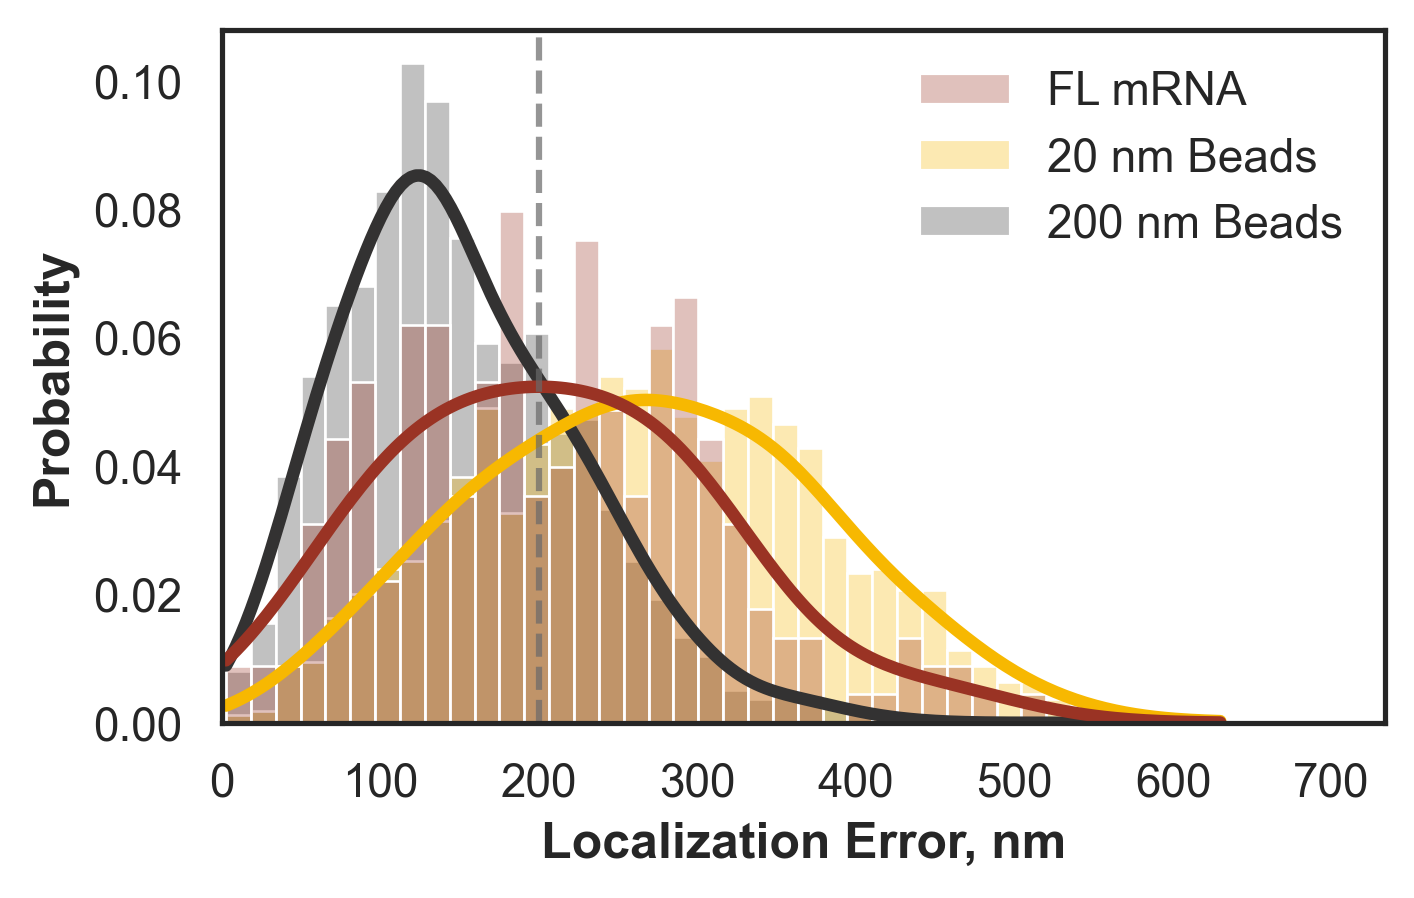

200 nm Beads 2913
20 nm Beads 3139
FL mRNA 540


In [4]:
data = df_all[df_all["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["linear_fit_R2"] > 0.7]
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_sigma",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    kde=True,
    kde_kws={"bw_adjust": 1.5},
    line_kws={"lw": 3},
    alpha=0.3,
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.axvline(threshold_max_d_anytwo_nm, ls="--", color="dimgray", alpha=0.7)
plt.xlim(0, df_all["linear_fit_sigma"].max())
plt.xlabel("Localization Error, nm", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("1.LocError_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
print(label_3, data[data["label"] == label_3].shape[0])

### Maximum Distance (whether static molecule)

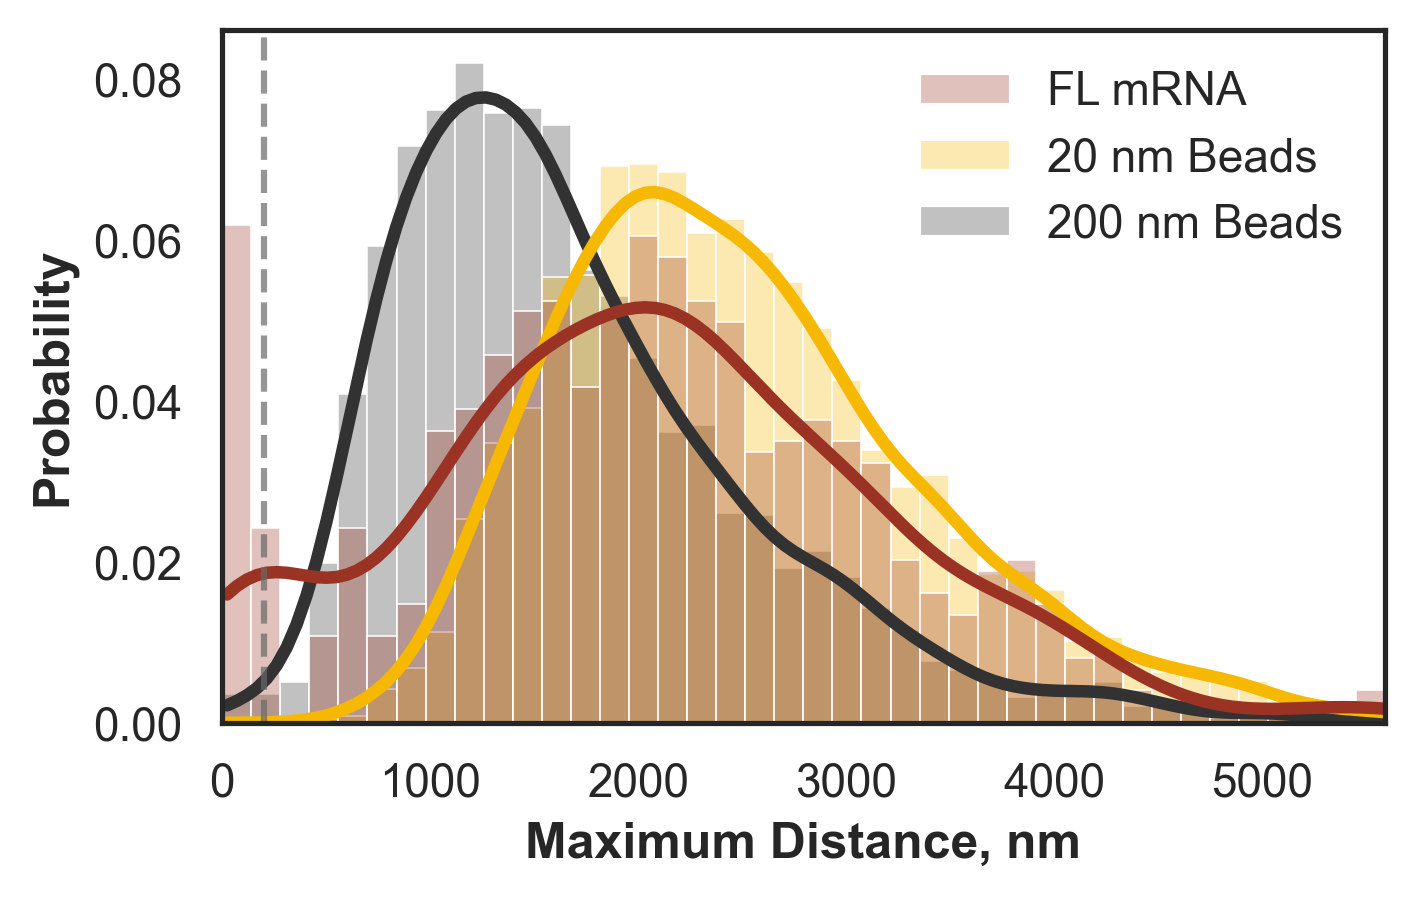

200 nm Beads 2913
20 nm Beads 3139
FL mRNA 540


In [5]:
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=df_all,
    x="max_d_anytwo_nm",
    hue="label",
    palette=palette,
    bins=40,
    binrange=(0, np.quantile(df_all["max_d_anytwo_nm"], 0.995)),
    stat="probability",
    common_norm=False,
    kde=True,
    kde_kws={"bw_adjust": 1},
    line_kws={"lw": 3},
    alpha=0.3,
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.axvline(threshold_max_d_anytwo_nm, ls="--", color="dimgray", alpha=0.7)
plt.xlim(0, np.quantile(df_all["max_d_anytwo_nm"], 0.995))
plt.xlabel("Maximum Distance, nm", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("2.max_d_anytwo_nm_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
print(label_3, data[data["label"] == label_3].shape[0])

### alpha distribution

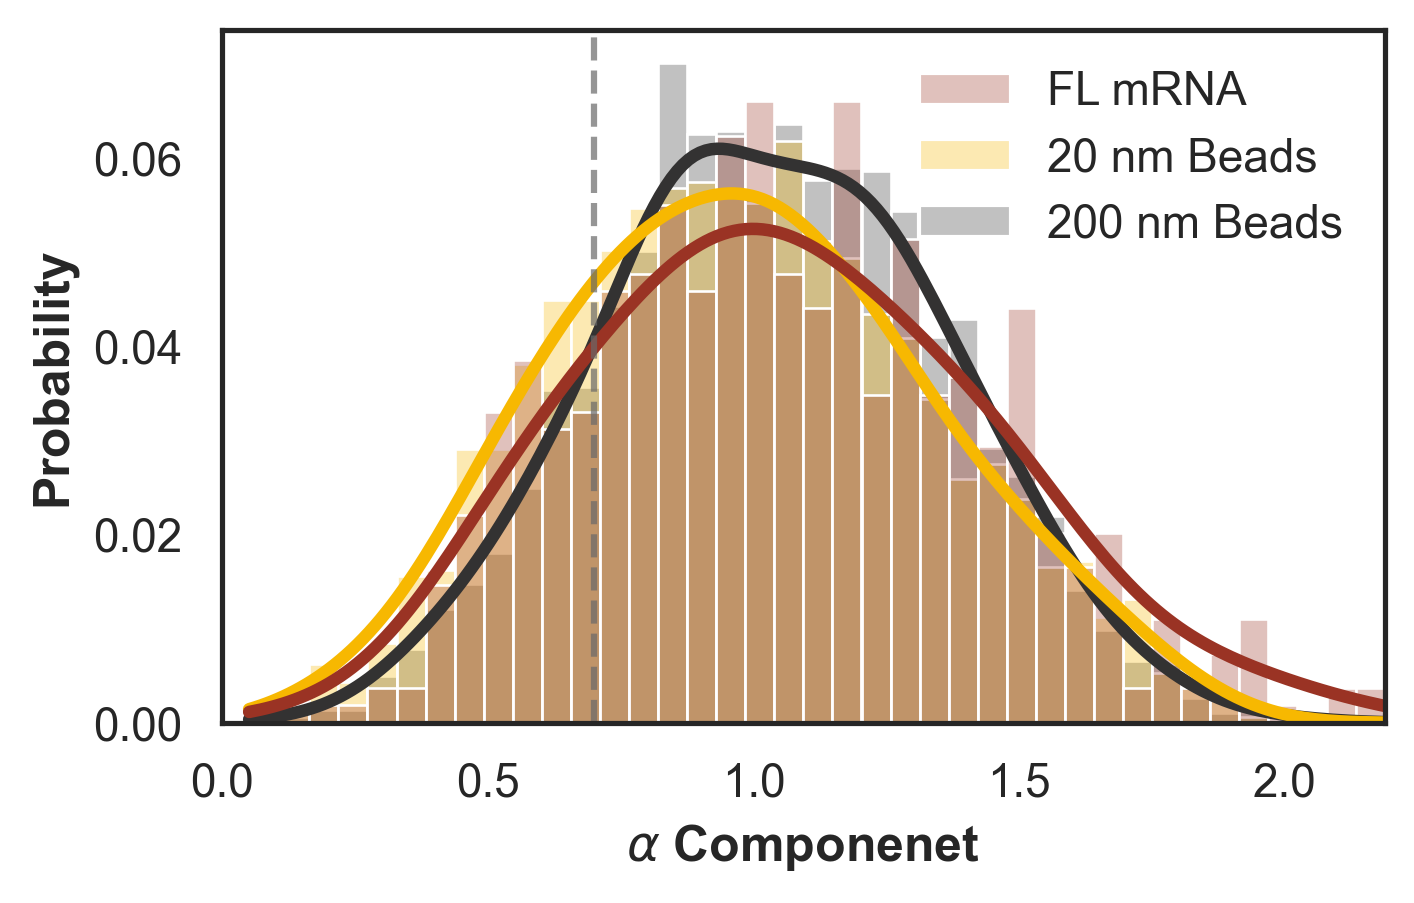

200 nm Beads 3052
20 nm Beads 3203
FL mRNA 545


In [6]:
plt.figure(figsize=(5, 3), dpi=300)
data = df_all[df_all["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["loglog_fit_R2"] > 0.7]
data = data[data["alpha"] > 0]
ax = sns.histplot(
    data=data,
    x="alpha",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(0, data["alpha"].max()),
    kde=True,
    kde_kws={"bw_adjust": 1.5},
    line_kws={"lw": 3},
    alpha=0.3,
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.axvline(0.7, ls="--", color="dimgray", alpha=0.7)
plt.xlim(0, data["alpha"].max())
plt.xlabel(r"$\alpha$ Componenet", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("3.alpha_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
print(label_3, data[data["label"] == label_3].shape[0])

### D distribution among the non contrained molecules

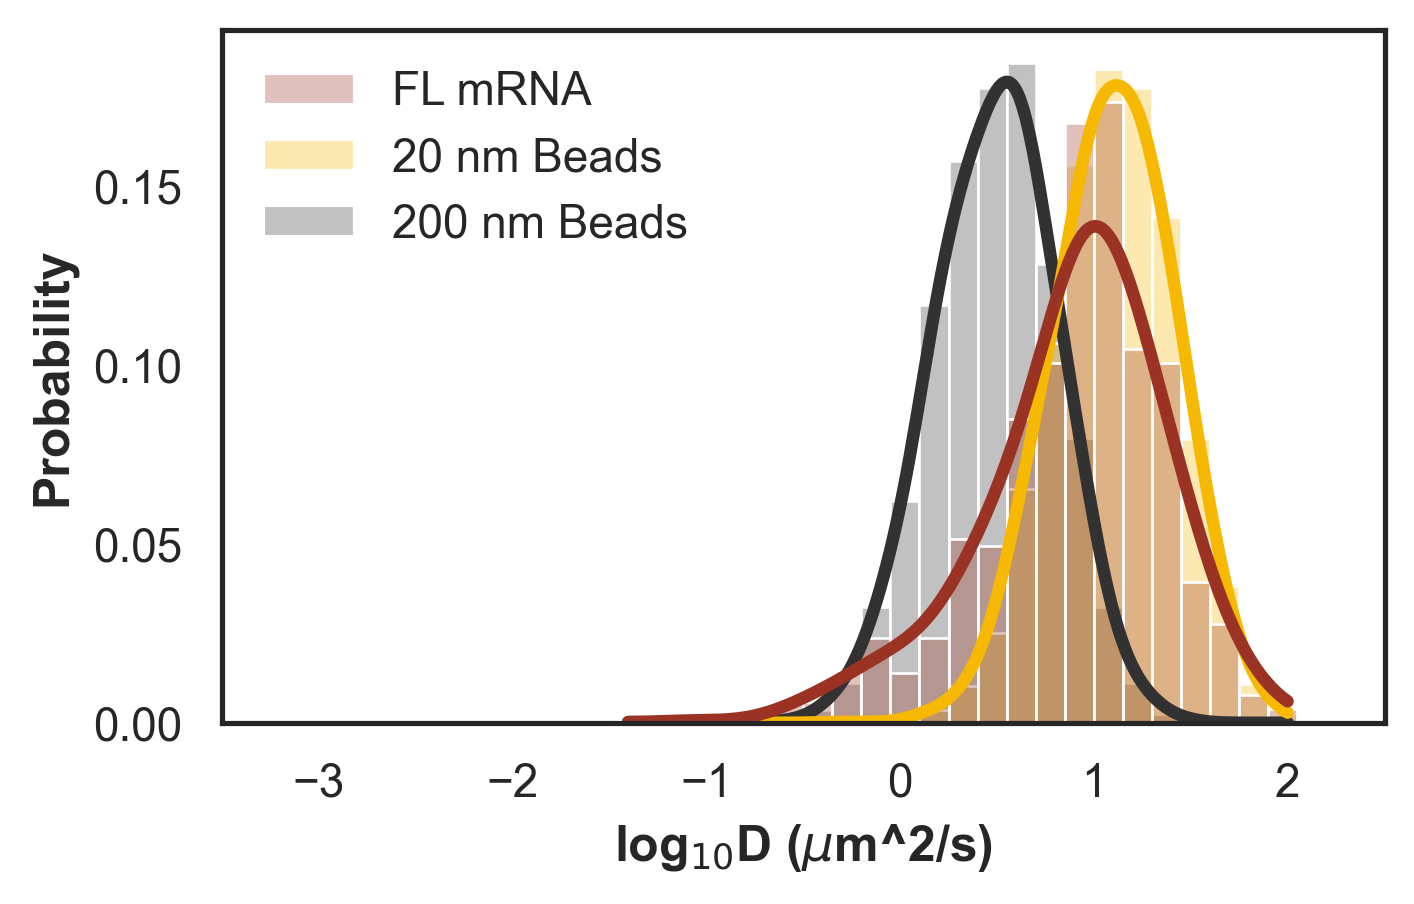

200 nm Beads 2803
20 nm Beads 2846
FL mRNA 507


In [7]:
data = df_all[df_all["linear_fit_R2"] > 0.7]
data = data[data["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["alpha"] > 0.5]
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_log10D",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    kde=True,
    kde_kws={"bw_adjust": 1.5},
    binrange=(-3.5, 2.5),
    line_kws={"lw": 3},
    alpha=0.3,
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.xlim(-3.5, 2.5)
plt.xlabel(r"log$_{10}$D ($\mu$m^2/s)", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("5.ApparentD_linear_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
print(label_3, data[data["label"] == label_3].shape[0])

### Fitting R2 of all mobile molecules except alpha < 0.2 bad fitting

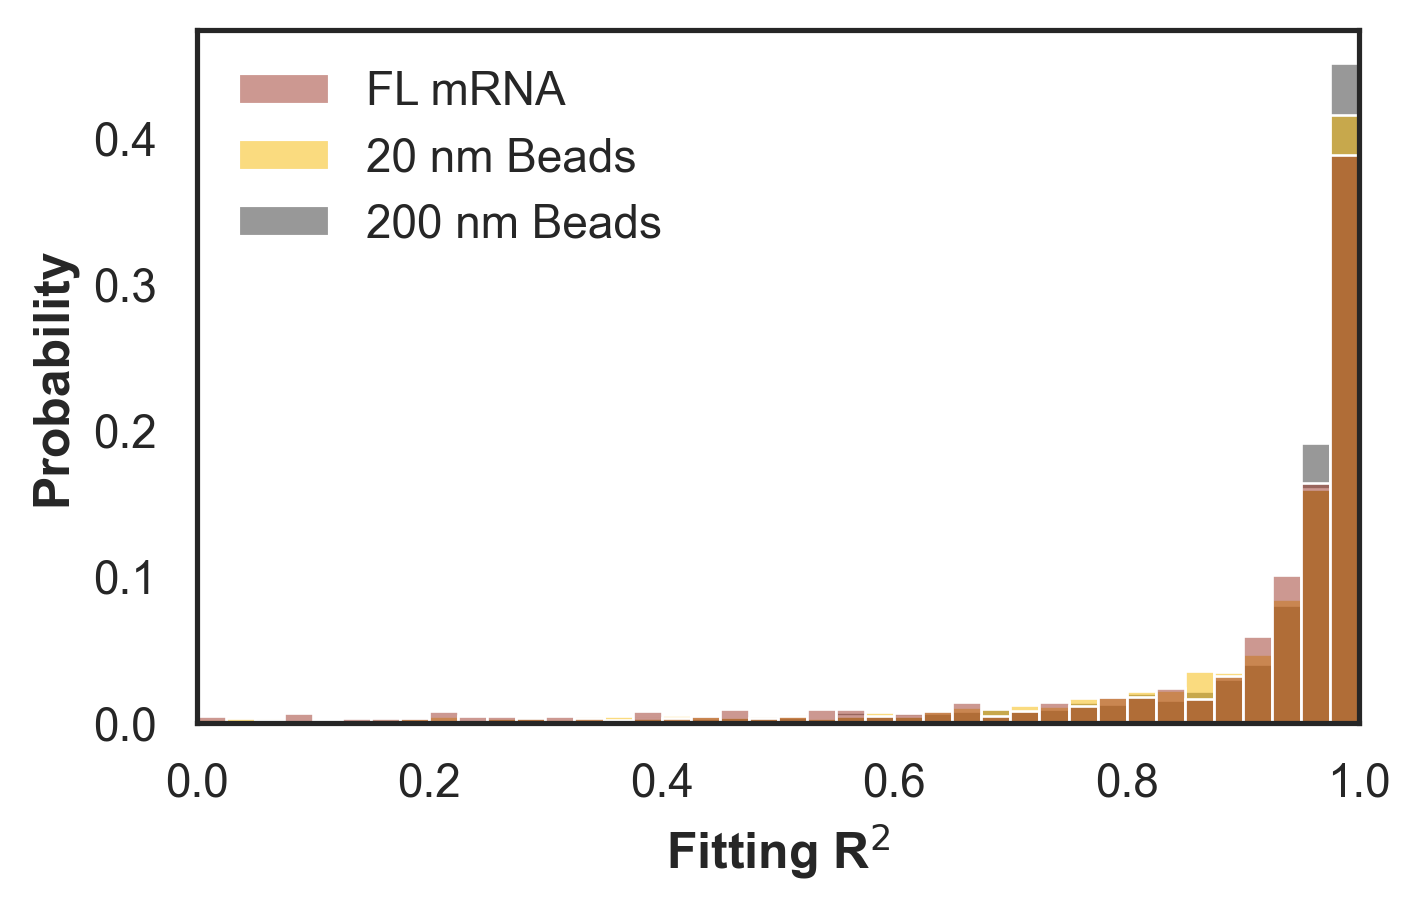

200 nm Beads 3233
20 nm Beads 3503
FL mRNA 622


In [8]:
data = df_all[df_all["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["alpha"] > 0.2]
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_R2",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(0, 1),
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.xlim(0, 1)
plt.xlabel(r"Fitting R$^2$", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("SM1.fitting_R2_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
print(label_3, data[data["label"] == label_3].shape[0])